In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import required libraries


In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re
import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Sheree


In [ ]:
data_path = '/content/drive/My Drive/Devanagari/Sheree_Devanagari_final.csv'
df = pd.read_csv(data_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      3865 non-null   object 
 1   author        3864 non-null   object 
 2   published_at  3864 non-null   object 
 3   like_count    3864 non-null   float64
 4   text          3458 non-null   object 
 5   time_period   3865 non-null   object 
 6   script        3865 non-null   object 
dtypes: float64(1), object(6)
memory usage: 211.5+ KB


Preprocessing

In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
before_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_df = df_filtered[df_filtered['time_period'] == 'after_election']

In [ ]:
df1= before_df['text']
df2= after_df['text']

In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines1 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines1.append(w)


print(lines1)

['साइको', 'अस्ति', 'मलाइ', 'बातो', 'लास्ट', 'लिङ', 'हानिस', 'यार', 'हिन्दु', 'हिन्दू', 'भाइ', 'भाई', 'यसलाइ', 'भोट', 'दिएर', 'जितौने', 'जनता', 'कटि', 'महा', 'वेदहोलान्', 'जनताले', 'सोधेको', 'सावल्को', 'जवाफ', 'रामरो', 'संग', 'दिना', 'नसक्ने', 'रामरो', 'बोलना', 'नसकने', 'के', 'प्रधानमन्त्री', 'होला', 'यस्ता', 'बुढा', 'मलाई', 'सुपारी', 'निकलके', 'बोलना', 'रे', 'हर', 'हर', 'महादेव', 'हाहा', 'pm', 'जनता', 'भेडा', 'झै', 'लुटेरा', 'खाउ', 'के', 'बोलेको', 'हो', 'केही', 'बुझदैना', '<br>नेपाली', 'बोलेको', 'त', 'बुझदैना', 'अरु', 'देस', 'को', 'वासा', 'कसरी', 'बोल्सा', 'होला', 'vaak', 'mg', 'mcc', 'छैन', 'संसारको', 'सब', 'वन्द', 'गारो', 'सेरे', 'ले', 'बोलेको', 'कुरा', 'बुझा...', 'जसरी', 'पनि', 'सेरे', 'काटी', 'इमानदार', 'देख्यौं', 'खतरा', 'प्रश्न', 'tq', 'dd', 'हेटेरी', 'भेन', 'यो<br>सेरे', 'कुकुर', 'भानेर', 'भनान', 'बैनी', '<br>यस्ता', 'को', 'समरोमा', 'नी', 'कुकुर', 'लाइ', 'मात्र', 'छोड्नु', 'पक्स', 'दुइजानाई', 'उस्तै', 'उस्तै', 'पारेक्सा', ',', '<br>', 'हाहाहाहा<br>देशको', 'प्रधानमन्त्री<br>कटि',

In [ ]:
import re

lines1 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines1]

lines1_final = []

for word in lines1:
    if word != '':
        lines1_final.append(word)

lines1_final


['सइक',
 'असत',
 'मलइ',
 'बत',
 'लसट',
 'लङ',
 'हनस',
 'यर',
 'हनद',
 'हनद',
 'भइ',
 'भई',
 'यसलइ',
 'भट',
 'दएर',
 'जतन',
 'जनत',
 'कट',
 'मह',
 'वदहलन',
 'जनतल',
 'सधक',
 'सवलक',
 'जवफ',
 'रमर',
 'सग',
 'दन',
 'नसकन',
 'रमर',
 'बलन',
 'नसकन',
 'क',
 'परधनमनतर',
 'हल',
 'यसत',
 'बढ',
 'मलई',
 'सपर',
 'नकलक',
 'बलन',
 'र',
 'हर',
 'हर',
 'महदव',
 'हह',
 'pm',
 'जनत',
 'भड',
 'झ',
 'लटर',
 'खउ',
 'क',
 'बलक',
 'ह',
 'कह',
 'बझदन',
 'brनपल',
 'बलक',
 'त',
 'बझदन',
 'अर',
 'दस',
 'क',
 'वस',
 'कसर',
 'बलस',
 'हल',
 'vaak',
 'mg',
 'mcc',
 'छन',
 'ससरक',
 'सब',
 'वनद',
 'गर',
 'सर',
 'ल',
 'बलक',
 'कर',
 'बझ',
 'जसर',
 'पन',
 'सर',
 'कट',
 'इमनदर',
 'दखय',
 'खतर',
 'परशन',
 'tq',
 'dd',
 'हटर',
 'भन',
 'यbrसर',
 'ककर',
 'भनर',
 'भनन',
 'बन',
 'brयसत',
 'क',
 'समरम',
 'न',
 'ककर',
 'लइ',
 'मतर',
 'छडन',
 'पकस',
 'दइजनई',
 'उसत',
 'उसत',
 'परकस',
 'br',
 'हहहहbrदशक',
 'परधनमनतरbrकट',
 'रमर',
 'रयल',
 'घमट',
 'टइट',
 'नपल',
 'रमर',
 'सग',
 'बलन',
 'औदन',
 'म',
 'पन',
 'नपल',
 'ह',
 'र',
 'भखर

In [ ]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem1 = [word for word in lines1_final if word not in nepali_stop_words]

stem1

['सइक',
 'असत',
 'मलइ',
 'बत',
 'लसट',
 'लङ',
 'हनस',
 'यर',
 'हनद',
 'हनद',
 'भइ',
 'भई',
 'यसलइ',
 'भट',
 'दएर',
 'जतन',
 'जनत',
 'कट',
 'मह',
 'वदहलन',
 'जनतल',
 'सधक',
 'सवलक',
 'जवफ',
 'रमर',
 'सग',
 'दन',
 'नसकन',
 'रमर',
 'बलन',
 'नसकन',
 'क',
 'परधनमनतर',
 'हल',
 'यसत',
 'बढ',
 'मलई',
 'सपर',
 'नकलक',
 'बलन',
 'हर',
 'हर',
 'महदव',
 'हह',
 'pm',
 'जनत',
 'भड',
 'झ',
 'लटर',
 'खउ',
 'क',
 'बलक',
 'ह',
 'कह',
 'बझदन',
 'brनपल',
 'बलक',
 'बझदन',
 'अर',
 'दस',
 'क',
 'वस',
 'कसर',
 'बलस',
 'हल',
 'vaak',
 'mg',
 'mcc',
 'छन',
 'ससरक',
 'सब',
 'वनद',
 'गर',
 'सर',
 'ल',
 'बलक',
 'कर',
 'बझ',
 'जसर',
 'पन',
 'सर',
 'कट',
 'इमनदर',
 'दखय',
 'खतर',
 'परशन',
 'tq',
 'dd',
 'हटर',
 'भन',
 'यbrसर',
 'ककर',
 'भनर',
 'भनन',
 'बन',
 'brयसत',
 'क',
 'समरम',
 'न',
 'ककर',
 'लइ',
 'मतर',
 'छडन',
 'पकस',
 'दइजनई',
 'उसत',
 'उसत',
 'परकस',
 'br',
 'हहहहbrदशक',
 'परधनमनतरbrकट',
 'रमर',
 'रयल',
 'घमट',
 'टइट',
 'नपल',
 'रमर',
 'सग',
 'बलन',
 'औदन',
 'पन',
 'नपल',
 'ह',
 'भखर',
 'बचद',
 'भर',
 'दश',

In [ ]:
!apt-get install -y fonts-noto


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

wordcloud formation

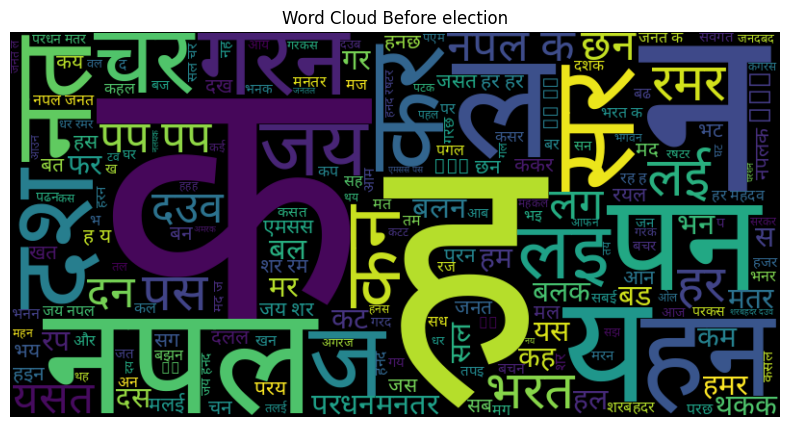

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem1

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before election')
plt.show()

In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines2 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines2.append(w)


print(lines2)

['hahaha', 'मलाई', 'पागल', 'वेद', 'हरु', 'जित्नौ', 'नी', 'बेला', 'इटै', 'मान्छे', 'लाइ', '४-५', 'छुटि', 'जितौछ', 'ऐले', 'गरिरा', 'के', 'हुन्छ', '?', 'झोल', 'मलाई', 'हारु', 'के', 'भने', 'जनता', 'बेहदे', 'भये', 'पक्सी', 'आबा', 'सिद्धियो', 'यिनी', 'हारु', 'को', 'राजनैतिक', 'जीवन', '<br>२०८४', 'मा', 'हामि', 'यस्तो', 'ल्या', 'भोट', 'दिनक्सम', 'आनी', 'घंटा', 'बाँक्सा', 'देश', 'गगुबाग', 'महानायक', 'राजेश', 'हमाल', 'ज्यु...<br>गु', 'गोबर', 'ल्याथ', 'शेरे...', 'देश', 'लै', 'लुटने', 'हारु', 'नरक', 'जावोस', '<br>जीवन', 'मा', 'पानी', 'सुख', 'न', 'पावोस', '<br>सुखा', 'आये', 'पानी', 'बढि', 'बेला', 'ना', 'टिकोस', 'जसको', 'पार्टी', 'मा', 'भ्रष्टाचार', 'को', 'छानबिन', 'गरनु', 'पर्ने', 'छ', 'त्याही', 'सरकार', 'हा', 'हा', 'हा', 'यसलाइ', 'प्रचण्ड', 'भण्डा', 'अर्को', 'नौटंकी', '<br>जानेको', 'छैं', 'डाका', 'हारु', 'भ्रष्ट', 'हारुले', 'सिकाउचन', 'अरे', 'अब', 'हमाइलाई', 'नेपाली', 'संस्कार', '???', 'उपशीर्षक', 'रक्नुस', 'ना', 'यो', 'देउबा', 'ले', 'बोलेको', 'बुझाइना', 'माला।', 'अली।', 'सानो।', 'वायो।', 'नमस्ते।

In [ ]:
import re

lines2 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines2]

lines2_final = []

for word in lines2:
    if word != '':
        lines2_final.append(word)

lines2_final


['hahaha',
 'मलई',
 'पगल',
 'वद',
 'हर',
 'जतन',
 'न',
 'बल',
 'इट',
 'मनछ',
 'लइ',
 '४५',
 'छट',
 'जतछ',
 'ऐल',
 'गरर',
 'क',
 'हनछ',
 'झल',
 'मलई',
 'हर',
 'क',
 'भन',
 'जनत',
 'बहद',
 'भय',
 'पकस',
 'आब',
 'सदधय',
 'यन',
 'हर',
 'क',
 'रजनतक',
 'जवन',
 'br२०८४',
 'म',
 'हम',
 'यसत',
 'लय',
 'भट',
 'दनकसम',
 'आन',
 'घट',
 'बकस',
 'दश',
 'गगबग',
 'महनयक',
 'रजश',
 'हमल',
 'जयbrग',
 'गबर',
 'लयथ',
 'शर',
 'दश',
 'ल',
 'लटन',
 'हर',
 'नरक',
 'जवस',
 'brजवन',
 'म',
 'पन',
 'सख',
 'न',
 'पवस',
 'brसख',
 'आय',
 'पन',
 'बढ',
 'बल',
 'न',
 'टकस',
 'जसक',
 'परट',
 'म',
 'भरषटचर',
 'क',
 'छनबन',
 'गरन',
 'परन',
 'छ',
 'तयह',
 'सरकर',
 'ह',
 'ह',
 'ह',
 'यसलइ',
 'परचणड',
 'भणड',
 'अरक',
 'नटक',
 'brजनक',
 'छ',
 'डक',
 'हर',
 'भरषट',
 'हरल',
 'सकउचन',
 'अर',
 'अब',
 'हमइलई',
 'नपल',
 'ससकर',
 'उपशरषक',
 'रकनस',
 'न',
 'य',
 'दउब',
 'ल',
 'बलक',
 'बझइन',
 'मल',
 'अल',
 'सन',
 'वय',
 'नमसत',
 'अल',
 'थल',
 'वयक',
 'वय',
 'हनथय',
 'नमसत',
 'ककर',
 'मनतर',
 'भयक',
 'क',
 'कम',
 'तर',
 'दश',
 'क',
 '

In [ ]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem2 = [word for word in lines2_final if word not in nepali_stop_words]

stem2

['hahaha',
 'मलई',
 'पगल',
 'वद',
 'हर',
 'जतन',
 'न',
 'बल',
 'इट',
 'मनछ',
 'लइ',
 '४५',
 'छट',
 'जतछ',
 'ऐल',
 'गरर',
 'क',
 'हनछ',
 'झल',
 'मलई',
 'हर',
 'क',
 'भन',
 'जनत',
 'बहद',
 'भय',
 'पकस',
 'आब',
 'सदधय',
 'यन',
 'हर',
 'क',
 'रजनतक',
 'जवन',
 'br२०८४',
 'हम',
 'यसत',
 'लय',
 'भट',
 'दनकसम',
 'आन',
 'घट',
 'बकस',
 'दश',
 'गगबग',
 'महनयक',
 'रजश',
 'हमल',
 'जयbrग',
 'गबर',
 'लयथ',
 'शर',
 'दश',
 'ल',
 'लटन',
 'हर',
 'नरक',
 'जवस',
 'brजवन',
 'पन',
 'सख',
 'न',
 'पवस',
 'brसख',
 'आय',
 'पन',
 'बढ',
 'बल',
 'न',
 'टकस',
 'जसक',
 'परट',
 'भरषटचर',
 'क',
 'छनबन',
 'गरन',
 'परन',
 'तयह',
 'सरकर',
 'ह',
 'ह',
 'ह',
 'यसलइ',
 'परचणड',
 'भणड',
 'अरक',
 'नटक',
 'brजनक',
 'डक',
 'हर',
 'भरषट',
 'हरल',
 'सकउचन',
 'अर',
 'हमइलई',
 'नपल',
 'ससकर',
 'उपशरषक',
 'रकनस',
 'न',
 'य',
 'दउब',
 'ल',
 'बलक',
 'बझइन',
 'मल',
 'अल',
 'सन',
 'वय',
 'नमसत',
 'अल',
 'थल',
 'वयक',
 'वय',
 'हनथय',
 'नमसत',
 'ककर',
 'मनतर',
 'भयक',
 'क',
 'कम',
 'दश',
 'क',
 'समपत',
 'लटर',
 'छर',
 'लइ',
 'कदन',
 'लकयर'

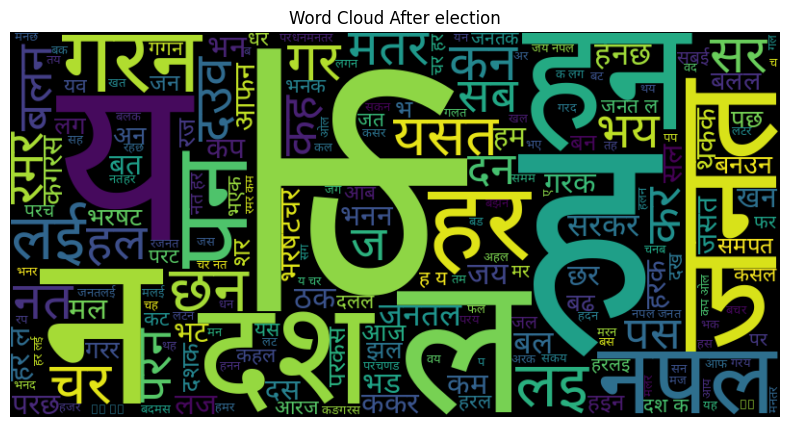

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem2

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After election')
plt.show()

In [ ]:
df = pd.read_csv(data_path)

Importing the Devanagari model

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="dpkrm/NepaliSentimentAnalysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script
0,-cQ3hXKab_c,@swastiksh,2022-11-16 14:27:50,0.0,साइको अस्ति मलाइ बातो लास्ट लिङ हानिस यार,before_election,Devanagari
1,yLiVSsEYgBY,@chandanmishra8320,2022-04-03 12:38:00,24.0,हिन्दु हिन्दू भाइ भाई,before_election,Devanagari
2,ua1rQtBI0bc,@amritsunuwar21,2022-11-21 08:37:17,0.0,यसलाइ भोट दिएर जितौने जनता कटि महा वेदहोलान्,before_election,Devanagari
3,cwv5NCEg1YA,@rakeshmeche4895,2022-07-16 11:13:05,1.0,जनताले सोधेको सावल्को जवाफ रामरो संग दिना नसक्...,before_election,Devanagari
4,ua1rQtBI0bc,@manojrai4678,2022-11-23 10:14:38,0.0,बुढा मलाई सुपारी निकलके बोलना रे,before_election,Devanagari
...,...,...,...,...,...,...,...
3453,lpey2ngFVtY,@saraswatipandeya1044,2024-07-02 05:19:34,0.0,कुशासन शुरु,after_election,Devanagari
3454,KnERXyWFVQw,@sanjuthapamagarvlogs,2024-07-02 07:17:10,0.0,काण्ड नै काण्डको फाईल रबीले अब खोल्ने भयो भनेर...,after_election,Devanagari
3455,SodqbAiyKRk,@ghanaguragai376,2024-11-15 04:48:57,0.0,विकल्पमा अर्को शेखर ढकाल उता उलाई जिताए हुन यह...,after_election,Devanagari
3456,EKsc91_6Jws,@Torangurung2334,2024-05-12 18:22:25,10.0,लुट्न सके लुट कान्छा लुट्न सके लुट,after_election,Devanagari


Predicting the sentiment label using the model

In [ ]:
# Example prediction logic with truncation
df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None

for i, text in enumerate(df_filtered['text']):  # Assuming 'text' is the column with the content
    result = pipe(text, truncation=True, padding=True, max_length=512)[0]  # Truncate and pad to 512 tokens
    df_filtered.at[i, 'sentiment_label'] = result['label']
    df_filtered.at[i, 'confidence_score'] = result['score']

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


<ipython-input-21-a5bc6cfc2f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
<ipython-input-21-a5bc6cfc2f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None


                                                text sentiment_label  \
0          साइको अस्ति मलाइ बातो लास्ट लिङ हानिस यार         LABEL_0   
1                              हिन्दु हिन्दू भाइ भाई         LABEL_2   
2       यसलाइ भोट दिएर जितौने जनता कटि महा वेदहोलान्         LABEL_0   
3  जनताले सोधेको सावल्को जवाफ रामरो संग दिना नसक्...         LABEL_0   
4                   बुढा मलाई सुपारी निकलके बोलना रे         LABEL_1   

  confidence_score  
0         0.999616  
1         0.999817  
2         0.999823  
3         0.796236  
4         0.999834  


In [ ]:
df_filtered


,video_id,author,published_at,like_count,text,time_period,script,sentiment_label,confidence_score
0,-cQ3hXKab_c,@swastiksh,2022-11-16 14:27:50,0.0,साइको अस्ति मलाइ बातो लास्ट लिङ हानिस यार,before_election,Devanagari,LABEL_0,0.999616
1,yLiVSsEYgBY,@chandanmishra8320,2022-04-03 12:38:00,24.0,हिन्दु हिन्दू भाइ भाई,before_election,Devanagari,LABEL_2,0.999817
2,ua1rQtBI0bc,@amritsunuwar21,2022-11-21 08:37:17,0.0,यसलाइ भोट दिएर जितौने जनता कटि महा वेदहोलान्,before_election,Devanagari,LABEL_0,0.999823
3,cwv5NCEg1YA,@rakeshmeche4895,2022-07-16 11:13:05,1.0,जनताले सोधेको सावल्को जवाफ रामरो संग दिना नसक्...,before_election,Devanagari,LABEL_0,0.796236
4,ua1rQtBI0bc,@manojrai4678,2022-11-23 10:14:38,0.0,बुढा मलाई सुपारी निकलके बोलना रे,before_election,Devanagari,LABEL_1,0.999834
...,...,...,...,...,...,...,...,...,...
3453,lpey2ngFVtY,@saraswatipandeya1044,2024-07-02 05:19:34,0.0,कुशासन शुरु,after_election,Devanagari,LABEL_0,0.999918
3454,KnERXyWFVQw,@sanjuthapamagarvlogs,2024-07-02 07:17:10,0.0,काण्ड नै काण्डको फाईल रबीले अब खोल्ने भयो भनेर...,after_election,Devanagari,LABEL_0,0.999118
3455,SodqbAiyKRk,@ghanaguragai376,2024-11-15 04:48:57,0.0,विकल्पमा अर्को शेखर ढकाल उता उलाई जिताए हुन यह...,after_election,Devanagari,LABEL_0,0.99924
3456,EKsc91_6Jws,@Torangurung2334,2024-05-12 18:22:25,10.0,लुट्न सके लुट कान्छा लुट्न सके लुट,after_election,Devanagari,LABEL_0,0.999902


In [ ]:
# Map the sentiment labels to corresponding names
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'positive',
    'LABEL_2': 'neutral'
}

# Apply the mapping to the 'sentiment_label' column
df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


                                                text sentiment_label  \
0          साइको अस्ति मलाइ बातो लास्ट लिङ हानिस यार        negative   
1                              हिन्दु हिन्दू भाइ भाई         neutral   
2       यसलाइ भोट दिएर जितौने जनता कटि महा वेदहोलान्        negative   
3  जनताले सोधेको सावल्को जवाफ रामरो संग दिना नसक्...        negative   
4                   बुढा मलाई सुपारी निकलके बोलना रे        positive   

  confidence_score  
0         0.999616  
1         0.999817  
2         0.999823  
3         0.796236  
4         0.999834  


<ipython-input-23-a3863f4511b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)


In [ ]:
# Saving the DataFrame to a CSV file in Google Drive
#df_filtered.to_csv('/content/drive/My Drive/Devanagari/merged_data_sentiment_Sheree.csv', index=False)

In [10]:
df_filtered = pd.read_csv('/content/drive/My Drive/Devanagari/merged_data_sentiment_Sheree.csv')

In [11]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script,sentiment_label,confidence_score
0,-cQ3hXKab_c,@swastiksh,2022-11-16 14:27:50,0.0,साइको अस्ति मलाइ बातो लास्ट लिङ हानिस यार,before_election,Devanagari,negative,0.999616
1,yLiVSsEYgBY,@chandanmishra8320,2022-04-03 12:38:00,24.0,हिन्दु हिन्दू भाइ भाई,before_election,Devanagari,neutral,0.999817
2,ua1rQtBI0bc,@amritsunuwar21,2022-11-21 08:37:17,0.0,यसलाइ भोट दिएर जितौने जनता कटि महा वेदहोलान्,before_election,Devanagari,negative,0.999823
3,cwv5NCEg1YA,@rakeshmeche4895,2022-07-16 11:13:05,1.0,जनताले सोधेको सावल्को जवाफ रामरो संग दिना नसक्...,before_election,Devanagari,negative,0.796236
4,ua1rQtBI0bc,@manojrai4678,2022-11-23 10:14:38,0.0,बुढा मलाई सुपारी निकलके बोलना रे,before_election,Devanagari,positive,0.999834
...,...,...,...,...,...,...,...,...,...
3453,lpey2ngFVtY,@saraswatipandeya1044,2024-07-02 05:19:34,0.0,कुशासन शुरु,after_election,Devanagari,negative,0.999918
3454,KnERXyWFVQw,@sanjuthapamagarvlogs,2024-07-02 07:17:10,0.0,काण्ड नै काण्डको फाईल रबीले अब खोल्ने भयो भनेर...,after_election,Devanagari,negative,0.999118
3455,SodqbAiyKRk,@ghanaguragai376,2024-11-15 04:48:57,0.0,विकल्पमा अर्को शेखर ढकाल उता उलाई जिताए हुन यह...,after_election,Devanagari,negative,0.999240
3456,EKsc91_6Jws,@Torangurung2334,2024-05-12 18:22:25,10.0,लुट्न सके लुट कान्छा लुट्न सके लुट,after_election,Devanagari,negative,0.999902


In [12]:
# Assuming 'time_period' is a column in your DataFrame and contains 'before_election' and 'after_election'
# and 'sentiment_label' contains the sentiment labels ('positive', 'negative', 'neutral')

# Filter for before_election and after_election
before_election_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_election_df = df_filtered[df_filtered['time_period'] == 'after_election']

# Count sentiment labels for before_election
before_election_counts = before_election_df['sentiment_label'].value_counts()

# Count sentiment labels for after_election
after_election_counts = after_election_df['sentiment_label'].value_counts()

# Display the counts
print("Sentiment counts before election:")
print(before_election_counts)

print("\nSentiment counts after election:")
print(after_election_counts)


Sentiment counts before election:
sentiment_label
negative    673
neutral     529
positive    352
Name: count, dtype: int64

Sentiment counts after election:
sentiment_label
negative    971
neutral     517
positive    416
Name: count, dtype: int64


Pie chart to show distribution of sentiments before and after the election

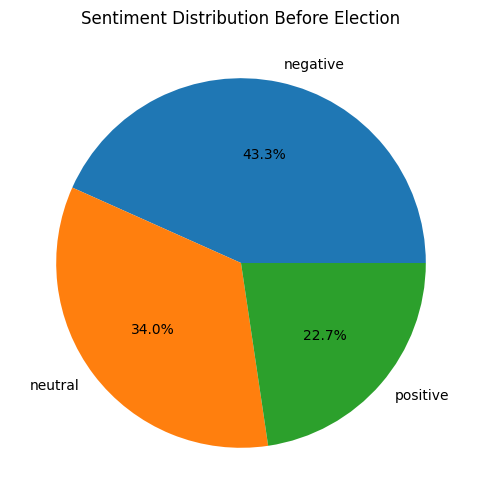

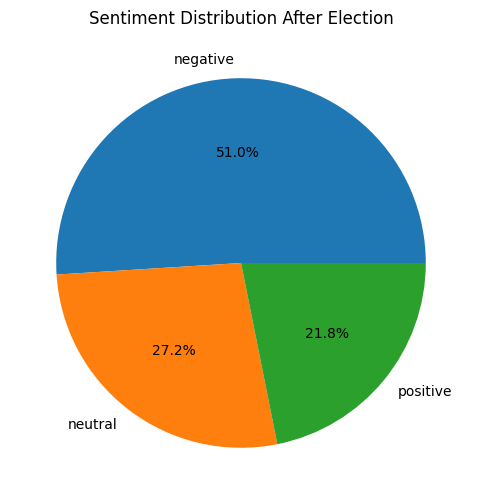

In [13]:
import matplotlib.pyplot as plt

# Plot the pie chart for before election
plt.figure(figsize=(6, 6))
before_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=before_election_counts.index)
plt.title('Sentiment Distribution Before Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()

# Plot the pie chart for after election
plt.figure(figsize=(6, 6))
after_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=after_election_counts.index)
plt.title('Sentiment Distribution After Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()


In [14]:
# Define a list of Nepali stopwords (you can add more words to this list if needed)
nepali_stopwords = [
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।'
    # Add any additional words you find unnecessary here
]

# Add English stopwords if you're also analyzing English texts
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Combine Nepali and English stopwords (optional)
stopwords_combined = set(nepali_stopwords + list(english_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-15-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-15-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


Top 10 Words Before Election:
     Word  Count
0      जय    123
1      है     75
2     mcc     71
3     चोर     70
4    भारत     68
5  नेपाली     66
6   देउवा     65
7    नेता     65
8    पानी     62
9      br     61

Top 10 Words After Election:
     Word  Count
0     चोर    153
1    नेता    112
2     लाइ    105
3    हारु    103
4  नेपाली     97
5   देउवा     82
6  राम्रो     77
7      br     68
8      लै     63
9      जय     62


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 109 (m) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 99 (c) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 98 (b) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarnin

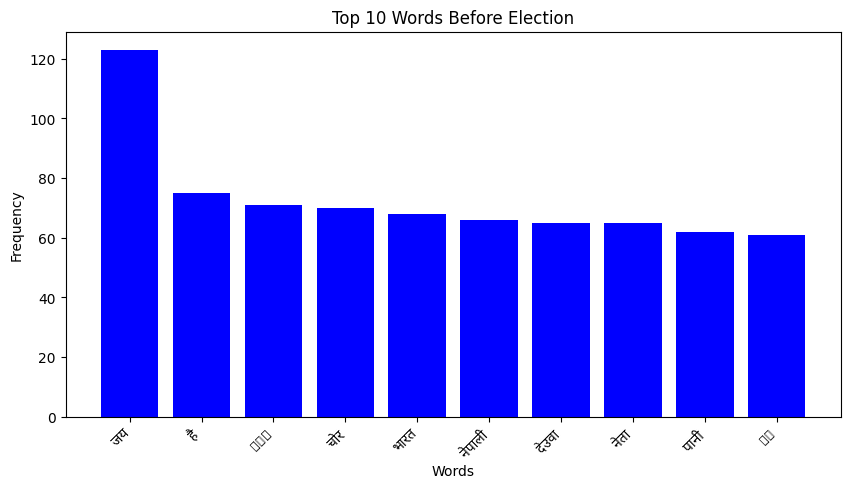

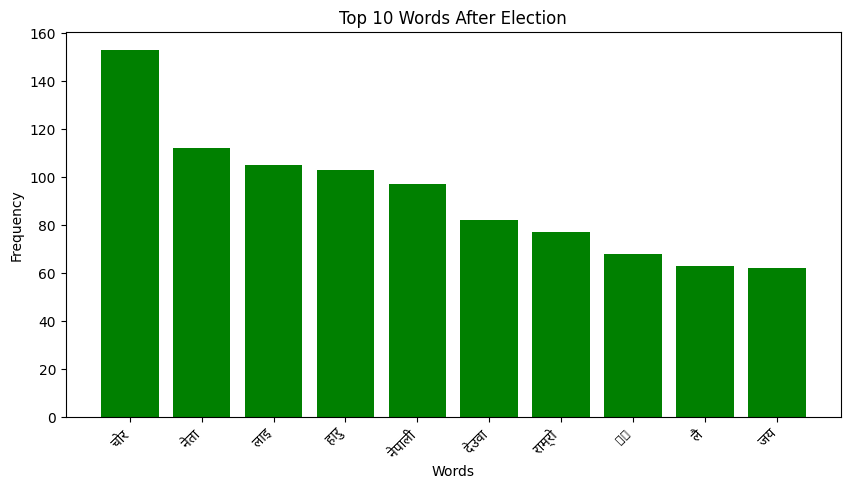

In [16]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import requests

# Load Devanagari-compatible font dynamically
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

# Download font if not already present
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# Load the font
deva_font = fm.FontProperties(fname=font_path)



# Recalculate word frequencies
before_election_words = [word for text in before_election_df['cleaned_text'] for word in text]
after_election_words = [word for text in after_election_df['cleaned_text'] for word in text]

before_election_word_counts = Counter(before_election_words)
after_election_word_counts = Counter(after_election_words)

# Get the top 10 most common words
top_before_words = before_election_word_counts.most_common(10)
top_after_words = after_election_word_counts.most_common(10)

# Convert to DataFrame for easy visualization
before_top_words_df = pd.DataFrame(top_before_words, columns=['Word', 'Count'])
after_top_words_df = pd.DataFrame(top_after_words, columns=['Word', 'Count'])

# Print the top words
print("Top 10 Words Before Election:")
print(before_top_words_df)

print("\nTop 10 Words After Election:")
print(after_top_words_df)

# Plot the top words before election
plt.figure(figsize=(10, 5))
plt.bar(before_top_words_df['Word'], before_top_words_df['Count'], color='blue')
plt.title('Top 10 Words Before Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()

# Plot the top words after election
plt.figure(figsize=(10, 5))
plt.bar(after_top_words_df['Word'], after_top_words_df['Count'], color='green')
plt.title('Top 10 Words After Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()
